In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
file='C:/Users/patel/Downloads/housing.csv'


In [8]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [9]:
df=pd.read_csv(file, encoding ='ascii')


In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [13]:
corr=df.corr()
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [14]:
print(df.corr().abs().nlargest(3,'MEDV').index)

Index(['MEDV', 'LSTAT', 'RM'], dtype='object')


In [15]:
#RM and LSTAT have the highest correlation values. We will hence use these two features to train the model.

Text(0, 0.5, 'MEDV')

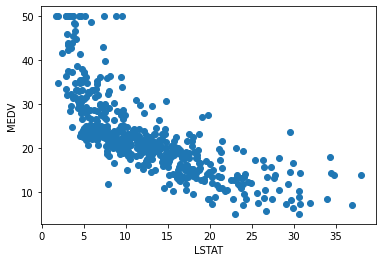

In [16]:
plt.scatter(df['LSTAT'],df['MEDV'],marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

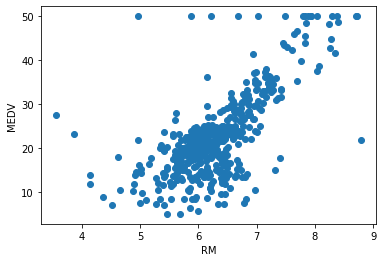

In [17]:
plt.scatter(df['RM'],df['MEDV'],marker='o')
plt.xlabel('RM')
plt.ylabel('MEDV')

In [18]:
from mpl_toolkits.mplot3d import Axes3D


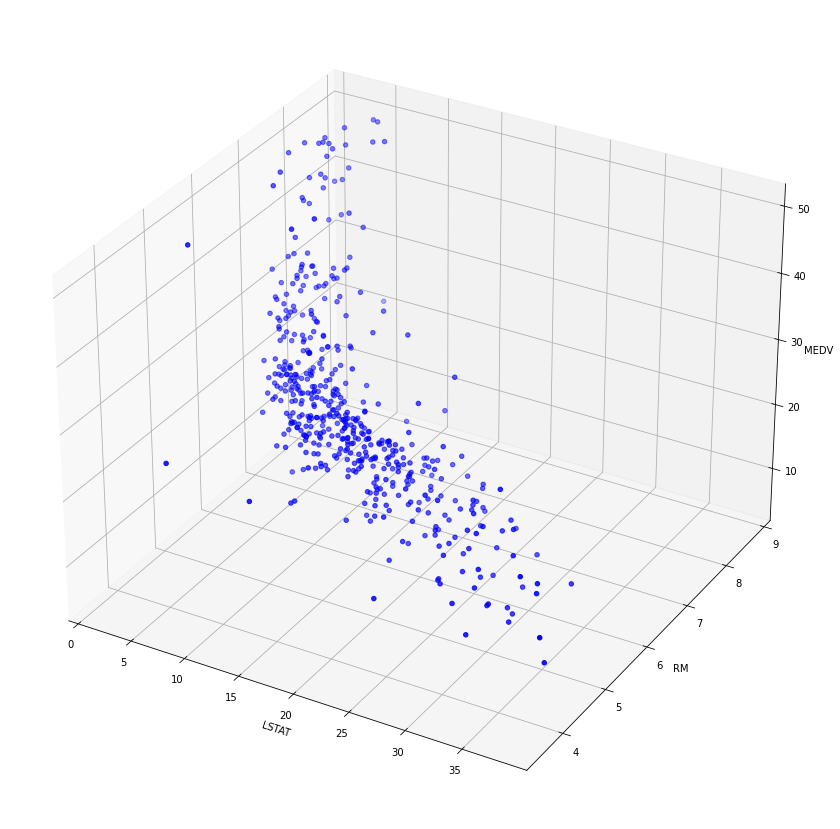

In [20]:
fig=plt.figure(figsize=(18,15))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(df['LSTAT'],
          df['RM'],
          df['MEDV'],
          c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()

In [29]:
x=pd.DataFrame(np.c_[df['LSTAT'],df['RM']],columns=['LSTAT','RM'])
y=df['MEDV']

In [31]:
from sklearn.model_selection import train_test_split
#performing test train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [32]:
print(x_train.shape)
print(y_train.shape)

(354, 2)
(354,)


In [33]:
print(x_test.shape)
print(y_test.shape)

(152, 2)
(152,)


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [36]:
price_pred=model.predict(x_test)

In [38]:
print('R-Squared: %.4f' % model.score(x_test,y_test))

R-Squared: 0.5999


In [68]:
from sklearn.preprocessing import PolynomialFeatures
degree=2
polynomial_features= PolynomialFeatures(degree=degree)

In [69]:
x_train_poly=polynomial_features.fit_transform(x_train)
print(x_train_poly)

[[  1.         5.21       6.43      27.1441    33.5003    41.3449  ]
 [  1.        12.04       6.176    144.9616    74.35904   38.142976]
 [  1.        10.21       5.682    104.2441    58.01322   32.285124]
 ...
 [  1.         5.99       6.635     35.8801    39.74365   44.023225]
 [  1.        23.27       6.629    541.4929   154.25683   43.943641]
 [  1.        10.63       6.405    112.9969    68.08515   41.024025]]


In [70]:
model2=LinearRegression()

In [71]:
model2.fit(x_train_poly,y_train)

LinearRegression()

In [72]:
x_test_poly=polynomial_features.fit_transform(x_test)

In [73]:
print('R-Squared: %.4f' % model2.score(x_test_poly,y_test))

R-Squared: 0.7508
